In [1]:
from crismy.crismy import CRISM
from crismy.utils import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = '/Users/andrew/Dropbox/Planetary/CRISM_Project/crism_data/hsp00017ba0_01_ra218l_trr3.img'
hsp = CRISM.open(f)


<Figure size 2160x2880 with 0 Axes>

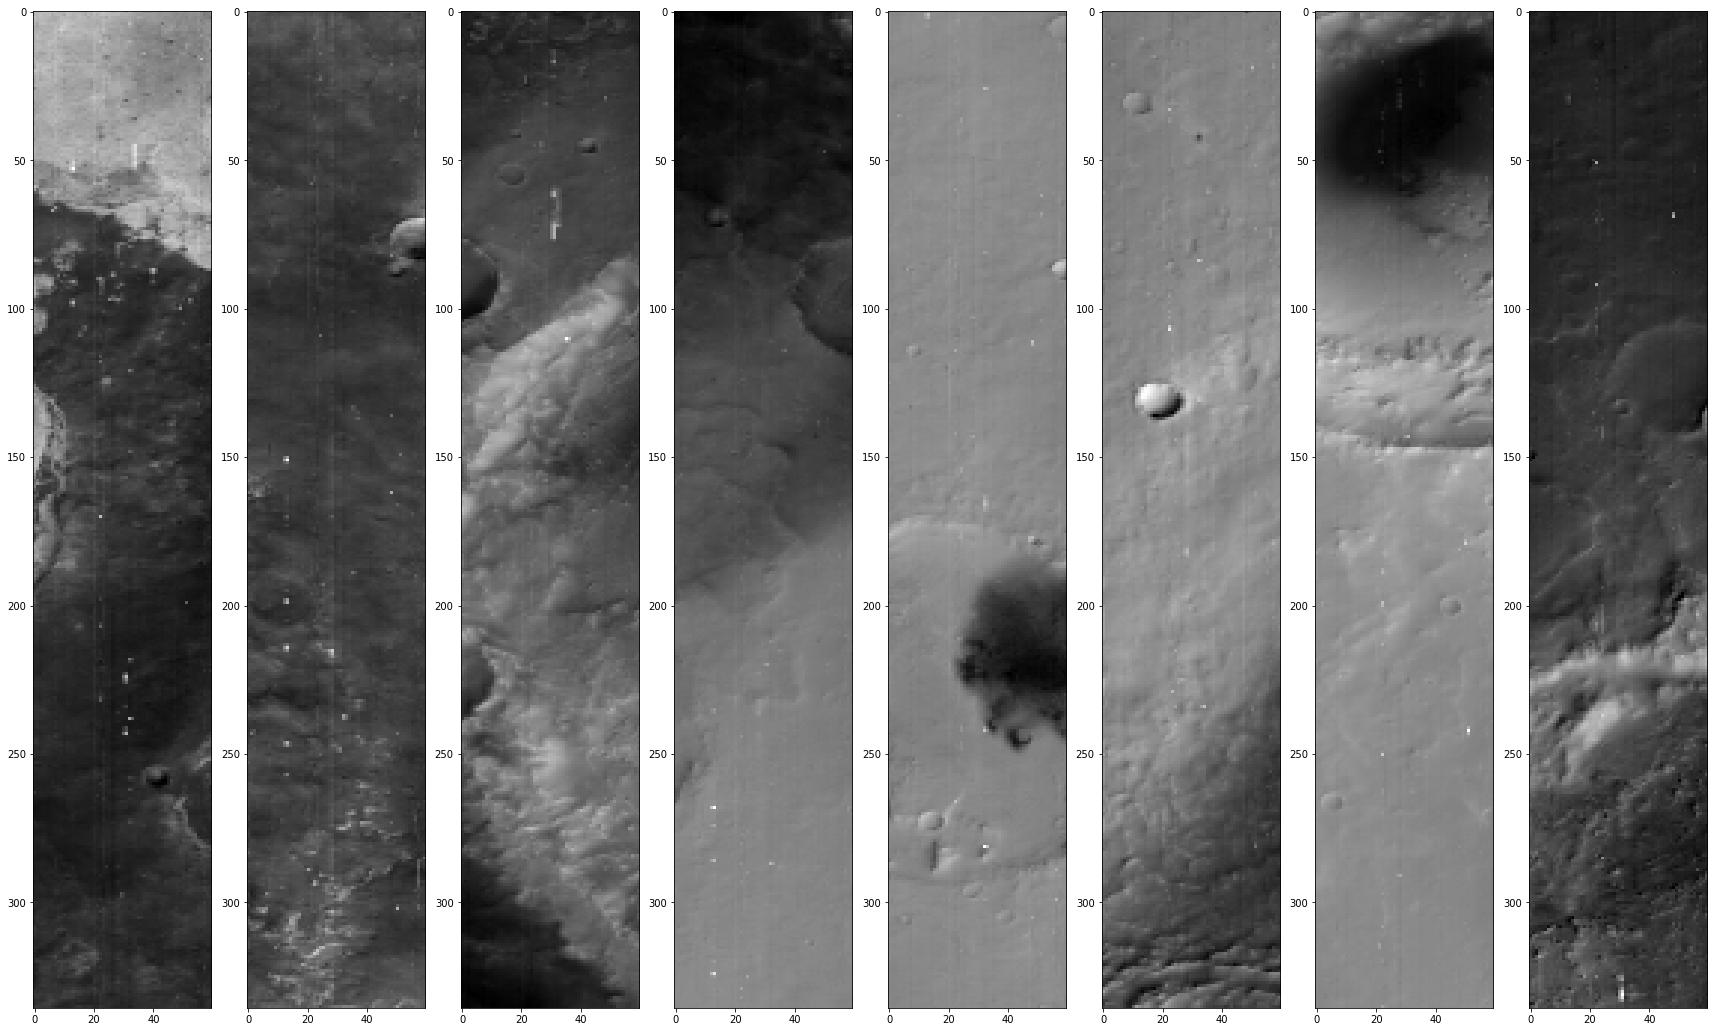

In [3]:
plt.figure(figsize=(30,40))
utils.view_hsp(hsp, 75, cols=8);

In [4]:
from sklearn.decomposition import PCA

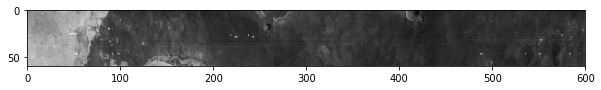

In [22]:
plt.figure(figsize=(10,20))
noisy = np.rot90(hsp[75][0:600])
plt.imshow(noisy, cmap='gray')

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [18]:
noisy.shape

(60, 600)

8


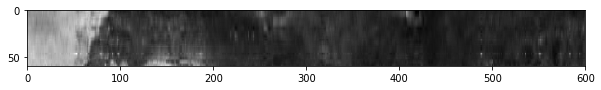

In [25]:
pca = PCA(0.85).fit(noisy)
print(pca.n_components_)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plt.figure(figsize=(10,20))
plt.imshow(filtered, cmap='gray')

4 0.95


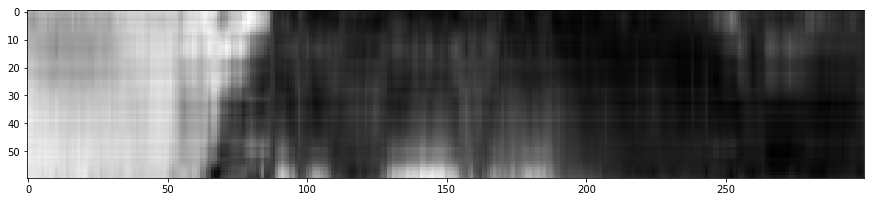

5 0.955


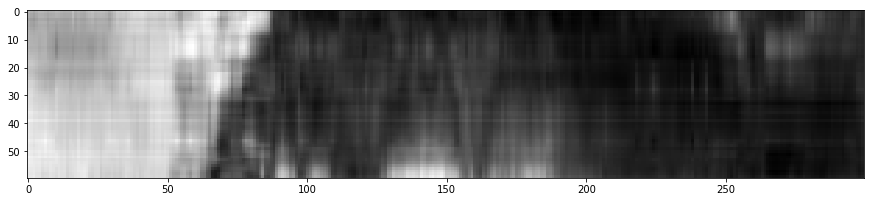

5 0.96


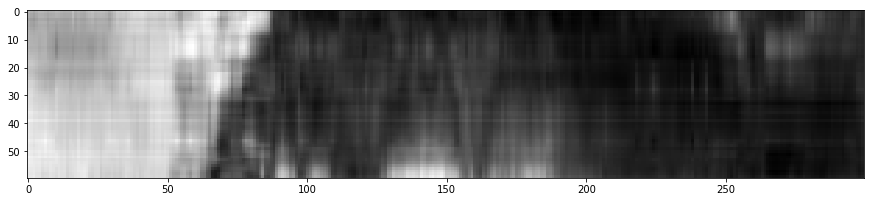

6 0.965


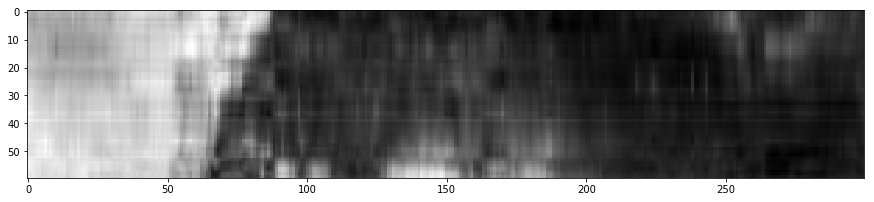

7 0.97


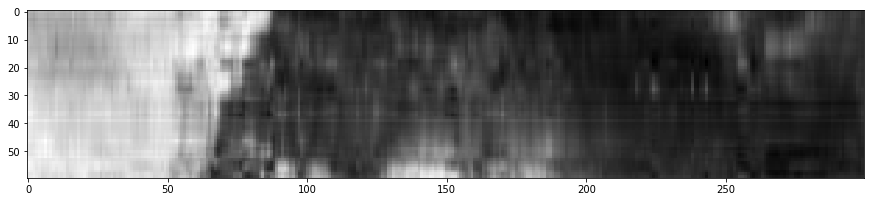

9 0.975


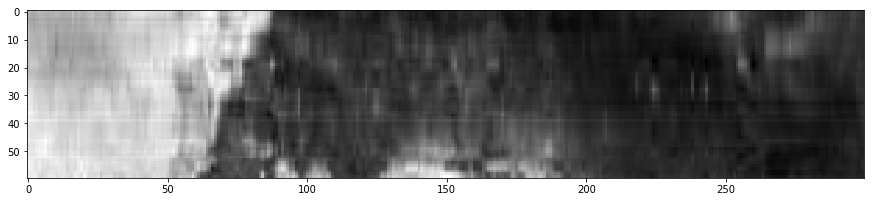

11 0.98


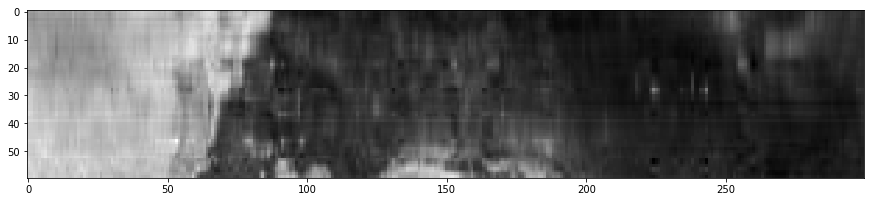

14 0.985


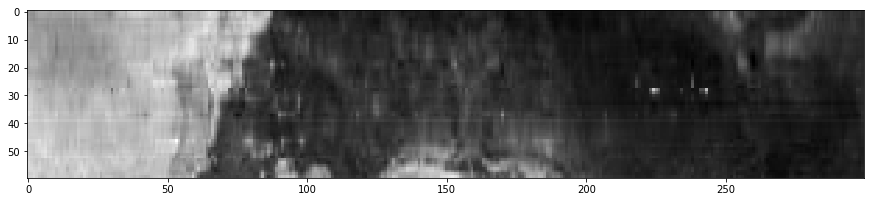

18 0.99


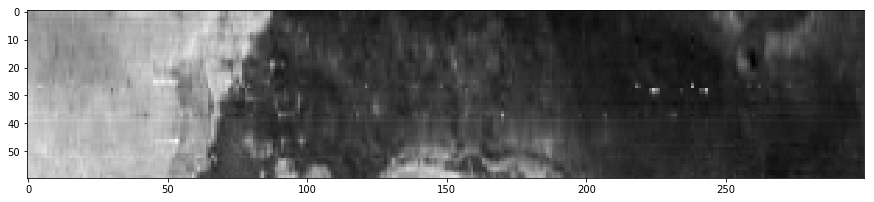

25 0.995


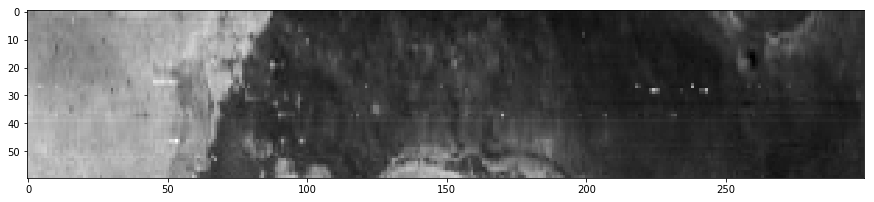

In [43]:
#noisy = np.rot90(hsp[75][0:600])
noisy = hsp[75][0:300].flatten()[np.newaxis,:]
for i in np.linspace(0.95, 1., num=10, endpoint=False):
    pca = PCA(float(i)).fit(noisy)
    print(pca.n_components_, i)
    components = pca.transform(noisy)
    filtered = pca.inverse_transform(components)
    plt.figure(figsize=(15,20))
    plt.imshow(np.rot90(filtered), cmap='gray', interpolation='nearest')
    plt.show()

In [45]:
noisy.flatten()[np.newaxis,:].shape

(1, 18000)

In [46]:
noisy.shape

(300, 60)

5 0.8


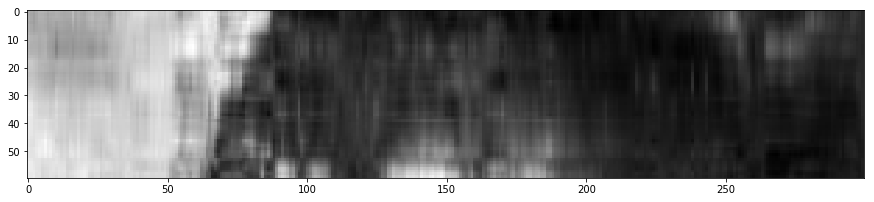

6 0.8200000000000001


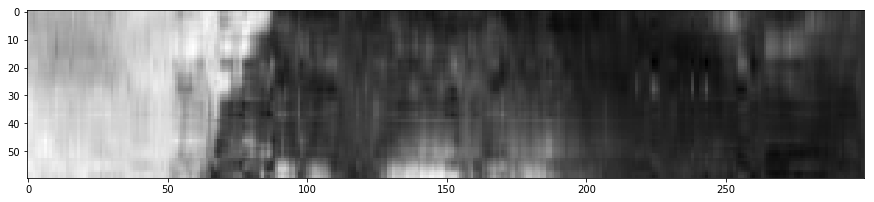

7 0.8400000000000001


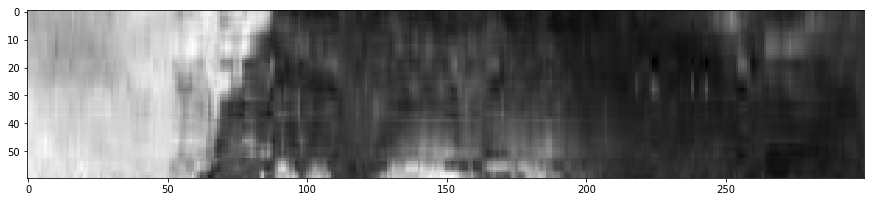

8 0.86


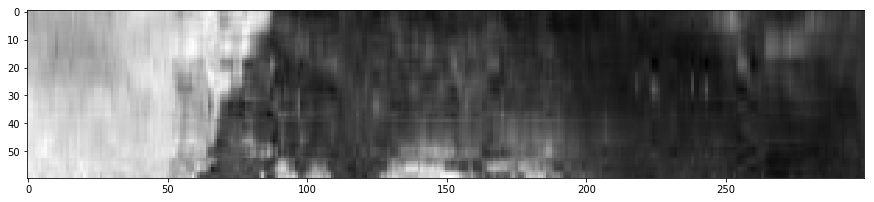

9 0.88


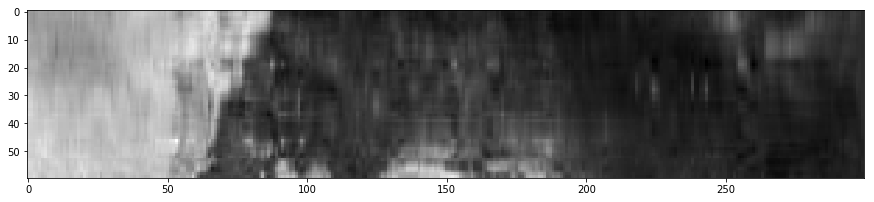

11 0.9


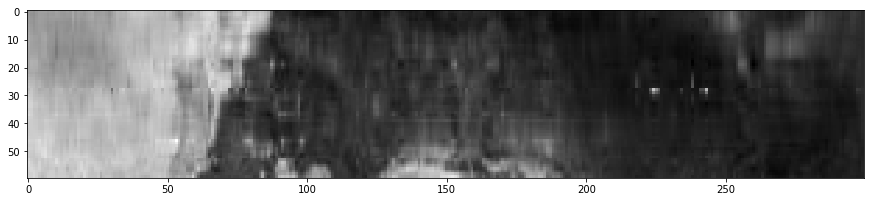

13 0.92


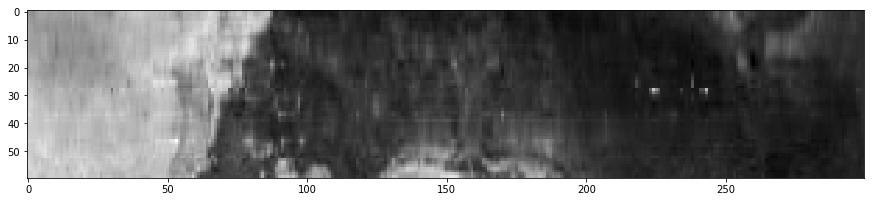

16 0.9400000000000001


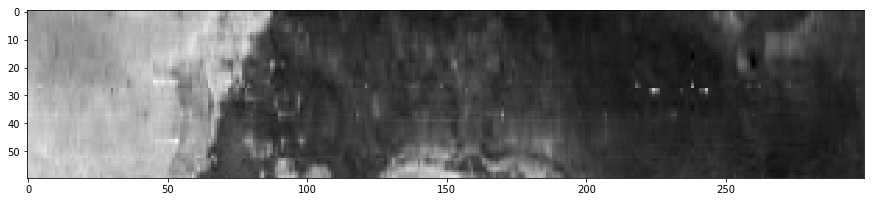

20 0.96


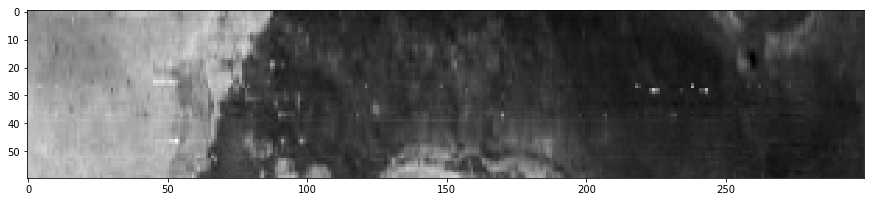

27 0.98


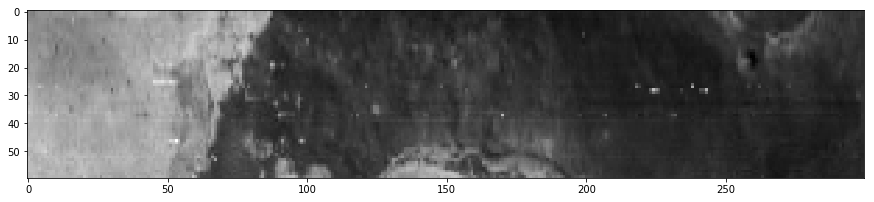

In [53]:
noisy = np.rot90(hsp[75][0:300])
for i in np.linspace(0.8, 1., num=10, endpoint=False):
    pca = PCA(float(i)).fit(noisy)
    print(pca.n_components_, i)
    components = pca.transform(noisy)
    filtered = pca.inverse_transform(components)
    plt.figure(figsize=(15,20))
    plt.imshow(filtered, cmap='gray', interpolation='nearest')
    plt.show()

/Users/andrew/.local/share/virtualenvs/crismy/lib/python3.7/site-packages/sklearn/decomposition/pca.py:423: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


1 0.1


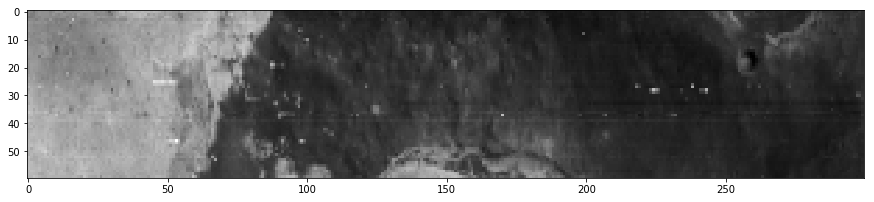

1 0.19


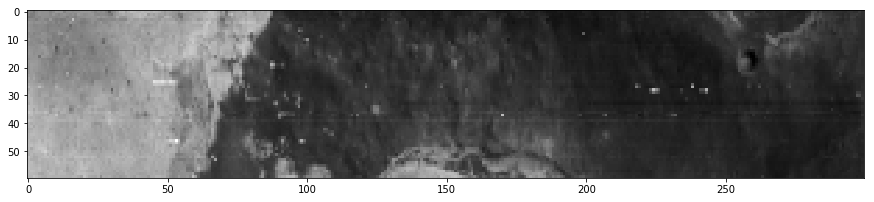

1 0.28


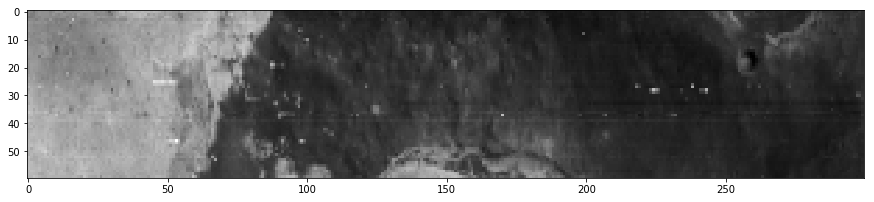

1 0.37


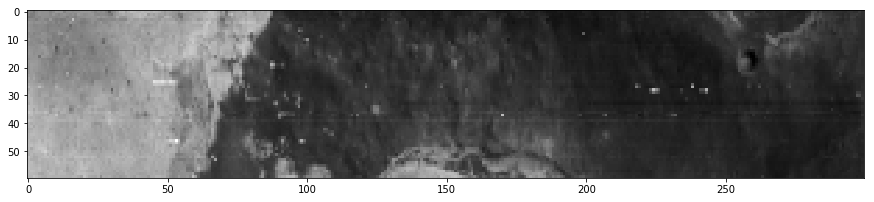

1 0.45999999999999996


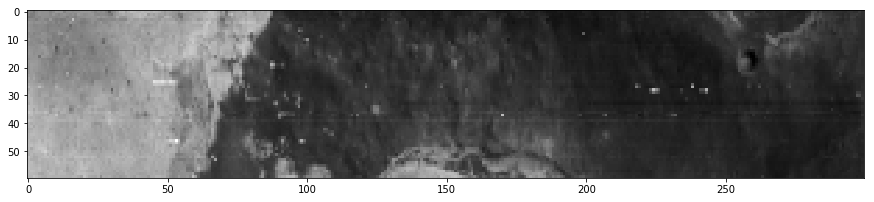

1 0.5499999999999999


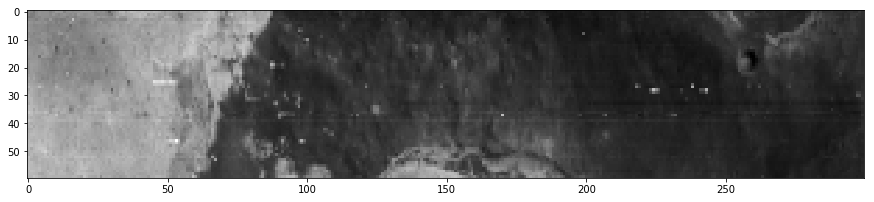

1 0.64


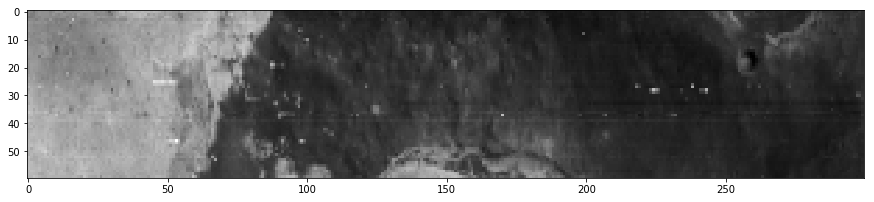

1 0.73


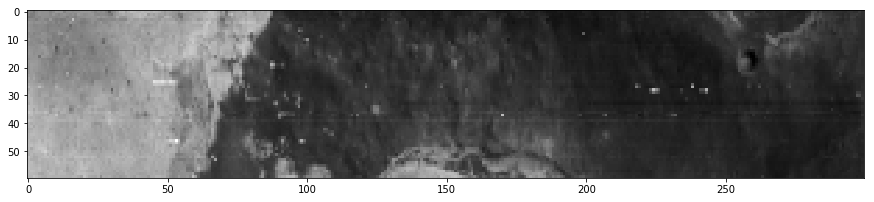

1 0.82


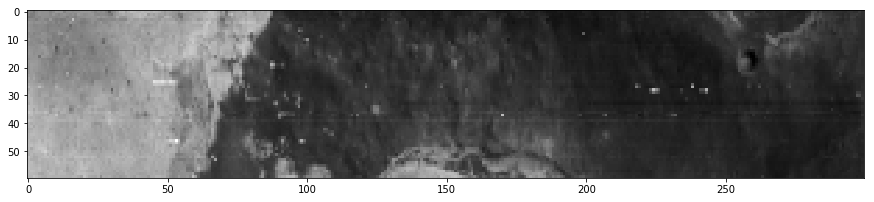

1 0.9099999999999999


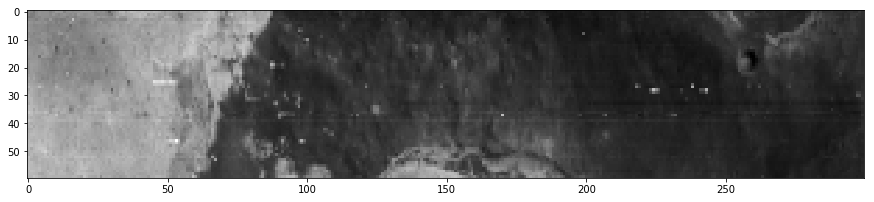

In [51]:
noisy = np.rot90(hsp[75][0:300]).flatten()[np.newaxis,:]
for i in np.linspace(0.1, 1., num=10, endpoint=False):
    pca = PCA(float(i)).fit(noisy)
    print(pca.n_components_, i)
    components = pca.transform(noisy)
    filtered = pca.inverse_transform(components)
    plt.figure(figsize=(15,20))
    plt.imshow(filtered.reshape((60, 300)), cmap='gray', interpolation='nearest')
    plt.show()

In [59]:
hsp[1:,30,30]

array([ 0.15620591,  0.17671552,  0.19642414,  0.1981473 ,  0.2669209 ,
        0.17626262,  0.15300044,  0.1314767 ,  0.10880051,  0.09713028,
        0.04829633,  0.08109134,  0.05515608, -0.02767186,  1.0120301 ,
        0.711851  ,  0.7230315 ,  0.751641  ,  0.71285135,  0.8188497 ,
        0.8652098 ,  0.8951348 ,  0.90883386,  0.9232248 ,  0.92693394,
        0.9328698 ,  0.95256555,  0.96310645,  0.9790237 ,  0.8951298 ,
        0.98098654,  1.0040115 ,  0.9222686 ,  1.0501307 ,  1.1289649 ,
        1.0598121 ,  1.0843524 ,  1.0000259 ,  1.115708  ,  1.1326469 ,
        1.0235459 ,  0.99669933,  1.1762    ,  1.0662342 ,  1.1831839 ,
        1.2111387 ,  1.1008697 ,  1.240887  ,  1.2567451 ,  1.2790599 ,
        1.0927948 ,  1.3069239 ,  1.3159941 ,  1.3287005 ,  1.3429531 ,
        1.3754961 ,  1.400716  ,  1.4078454 ,  1.437139  ,  1.4463333 ,
        1.4531355 ,  1.4787263 ,  1.492509  ,  1.5155184 ,  1.5324169 ,
        1.5563577 ,  1.3972343 ,  1.6040332 ,  1.5973086 ,  1.62

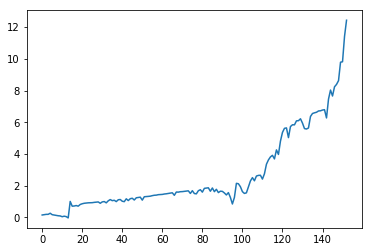

In [60]:
plt.plot(hsp[1:,30,30])

1


/Users/andrew/.local/share/virtualenvs/crismy/lib/python3.7/site-packages/sklearn/decomposition/pca.py:423: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


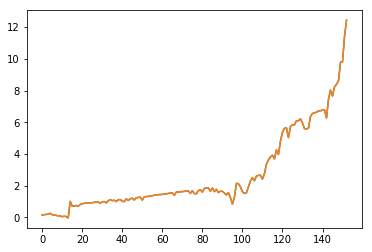

In [72]:
pca = PCA(0.1).fit([hsp[1:,30,30]])
print(pca.n_components_)
components = pca.transform([hsp[1:,30,30]])
filtered = pca.inverse_transform(components)
plt.plot(np.squeeze(filtered))
plt.plot(hsp[1:,30,30])